In [1]:
!pip install gdown
import gdown

gdown.download('https://drive.google.com/uc?id=173oL2ye73nECMXRIR1rMlZxe6VVCVbvA', 'news_class_dataset.json', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=173oL2ye73nECMXRIR1rMlZxe6VVCVbvA
To: /content/news_class_dataset.json
100%|██████████| 87.3M/87.3M [00:02<00:00, 30.6MB/s]


'news_class_dataset.json'

In [2]:
!pip install gdown
!pip install wordcloud
!pip install pandas
!pip install matplotlib
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd
import json

file_path = 'news_class_dataset.json'
df = pd.read_json(file_path, lines=True)
# Converting to lower case
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [4]:
# Dropping entries with NULL values
df = df.dropna()

links = df["link"]
dates = df["date"]

# Dropping irrelevant attributes
df.drop('link', axis=1)
df.drop('date', axis=1)


link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       over 4 million americans roll up sleeves for o...  u.s. news   
1       american airlines flyer charged, banned for li...  u.s. news   
2       23 of the funniest tweets about cats and dogs ...     comedy   
3       the funniest tweets from parents this week (se...  parenting   
4       woman who called cops on black bird-watcher lo...  u.s. news   
...                                                   ...        ...   
209522  rim ceo thorsten heins' 'significant' plans fo...       tech   
209523  maria sharapova stunned by victoria azarenka i...     sports   
209524  giants over patriots, jets over colts among  m...     sports   
209525  aldon smith arrested: 49ers linebacker busted ...     sports   
209526  dwight howard rips teammates after magic loss ...     sports   

                                        short_description  \
0       health experts said it is too early to predict...   
1       he was subdued by passengers and crew when he ...   
2       "until you have a dog you don't understand wha...   
3       "accidentally put grown-up toothpaste on my to...   
4       amy cooper accused investment firm franklin te...   
...                                                   ...   
209522  verizon wireless and at&t are already promotin...   
209523  afterward, azarenka, more effusive with the pr...   
209524  leading up to super bowl xlvi, the most talked...   
209525  correction: an earlier version of this story i...   
209526  the five-time all-star center tore into his te...   

                     authors  
0       carla k. johnson, ap  
1             mary papenfuss  
2              elyse wanshel  
3           caroline bologna  
4             nina golgowski  
...                      ...  
209522      reuters, reuters  
209523                        
209524                        
209525                        
209526                        

[209527 rows x 5 columns]

In [5]:
# !pip install pyspellchecker
# from spellchecker import SpellChecker

# spell_checker = SpellChecker()
# headlines = []
# misspell_count = 0
# corrected_headline = ""
# for headline in df["headline"]:
#   for word in headline.split():
#     corrected_word = spell_checker.correction(word)
#     if corrected_word != word and corrected_word != None:
#       print(f'The word "{word}" was misspelt. Corrected to: "{corrected_word}"')
#       misspell_count += 1
#       word = corrected_word
#     corrected_headline += word
#   headlines.append(corrected_headline)
# print("No. of words misspelt: ", misspell_count)

In [6]:
import re

print("Authors before cleaning: \n", df["authors"])
authors_list = []

for value in df["authors"]:
  authors = []
  if value[-4:] == ", ap":
    value = value[:-4]
  # Split the string based on ", " or " and "
  authors = re.split(r', | and ', value)
  authors = [x for x in authors if x]
  authors_list.append(authors)

print("\nAuthors after cleaning: \n", authors_list[:200])
df["authors"] = authors_list



Authors before cleaning: 
 0         carla k. johnson, ap
1               mary papenfuss
2                elyse wanshel
3             caroline bologna
4               nina golgowski
                  ...         
209522        reuters, reuters
209523                        
209524                        
209525                        
209526                        
Name: authors, Length: 209527, dtype: object

Authors after cleaning: 
 [['carla k. johnson'], ['mary papenfuss'], ['elyse wanshel'], ['caroline bologna'], ['nina golgowski'], [], ['elyse wanshel'], ['dánica coto'], ['marina fang'], ['aamer madhani'], ['graham dunbar'], ['mari yamaguchi'], ['dánica coto'], ['ben blanchet'], ['eric tucker', 'mary clare jalonick'], ['marco margaritoff'], ['marina fang', 'candice frederick'], ['beth harris'], ['jon gambrell'], ['dánica coto'], [], [], ['danica coto'], ['nina golgowski'], ['jonathan nicholson'], ['eric tucker', 'rahim faiez'], ['pat eaton-robb'], ['mike corder', 'jill lawless', 

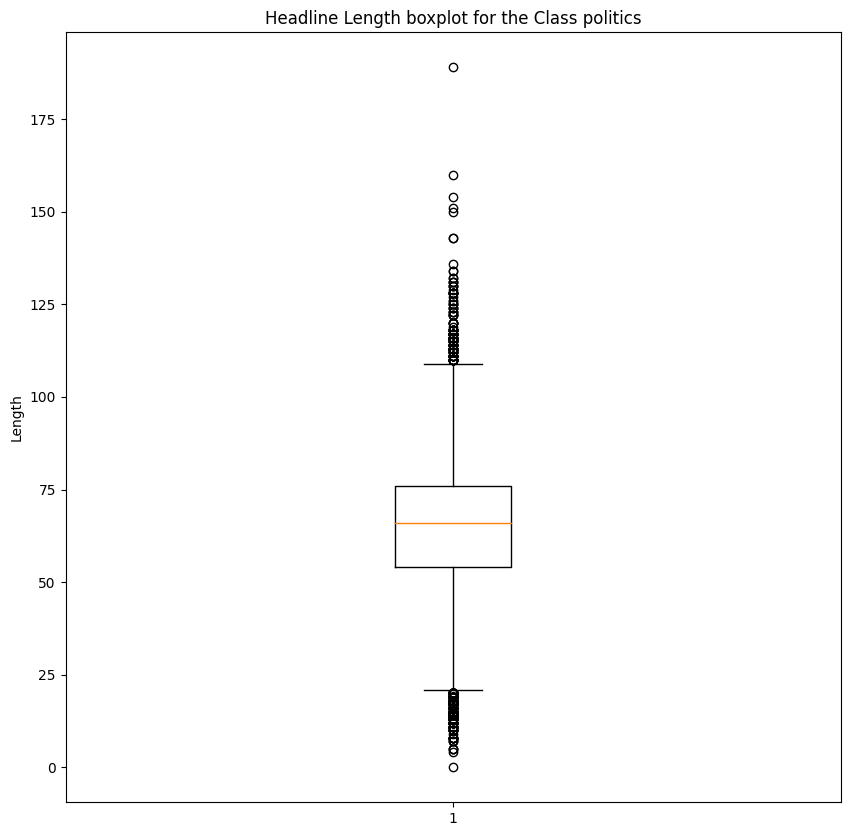

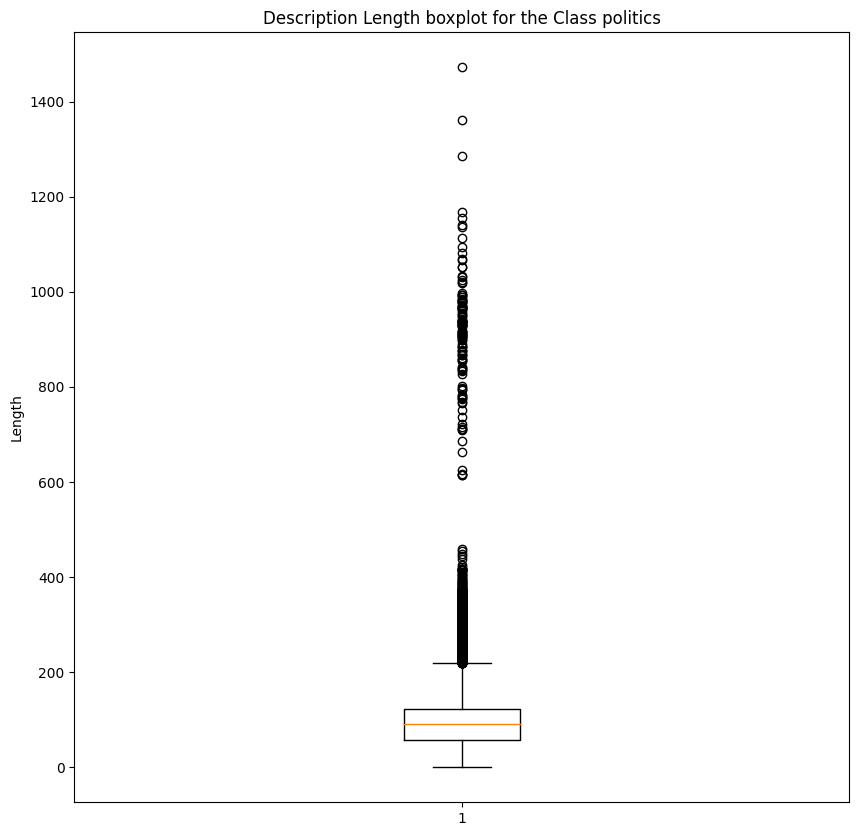

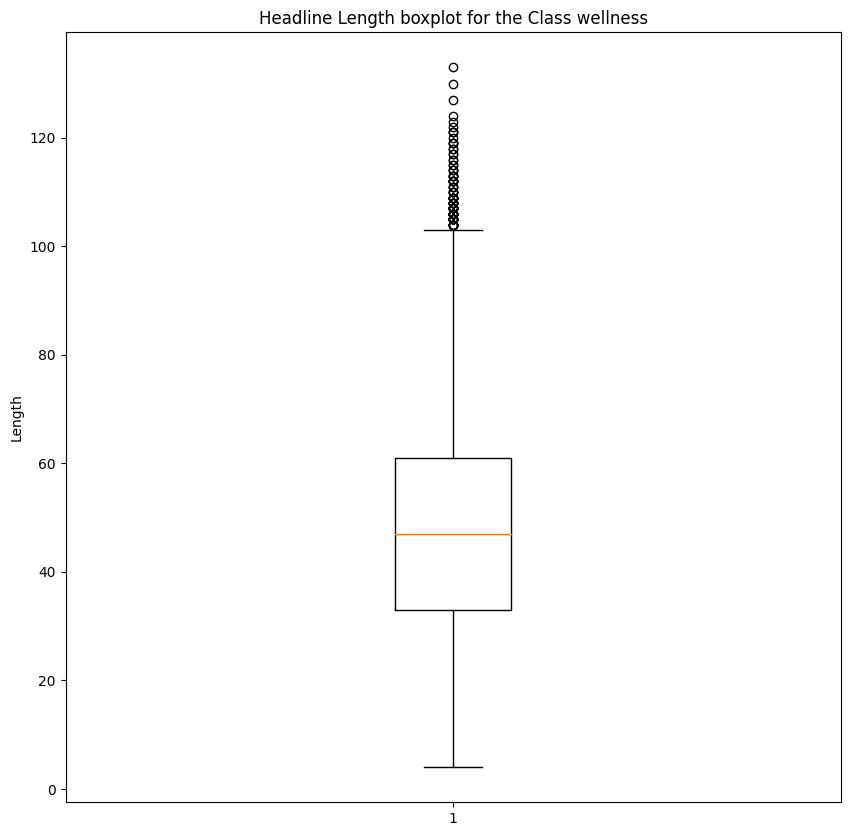

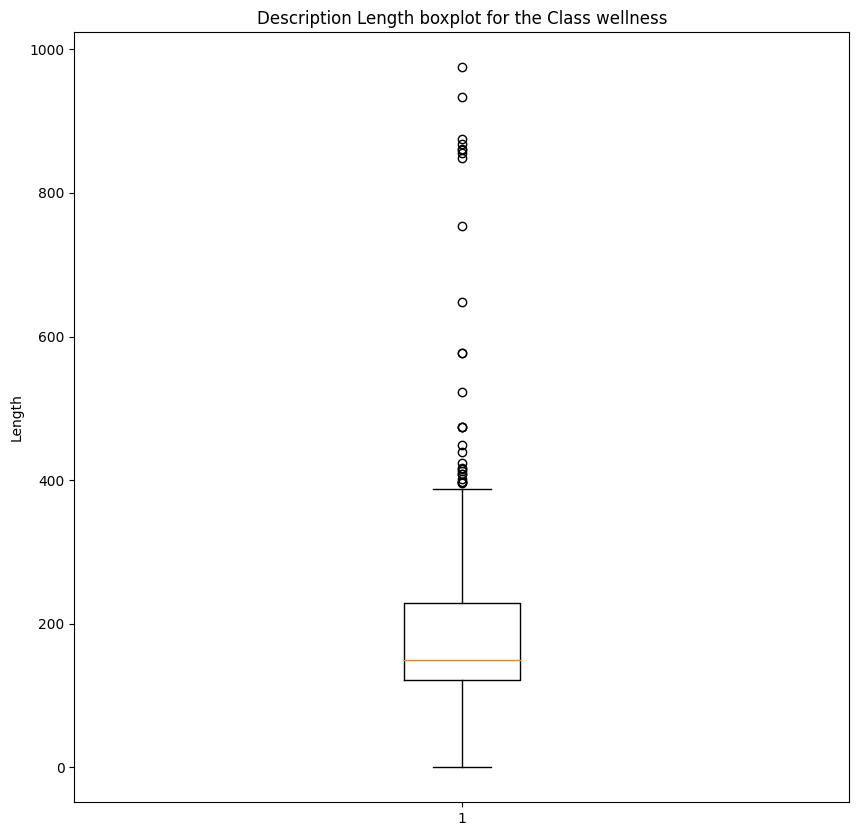

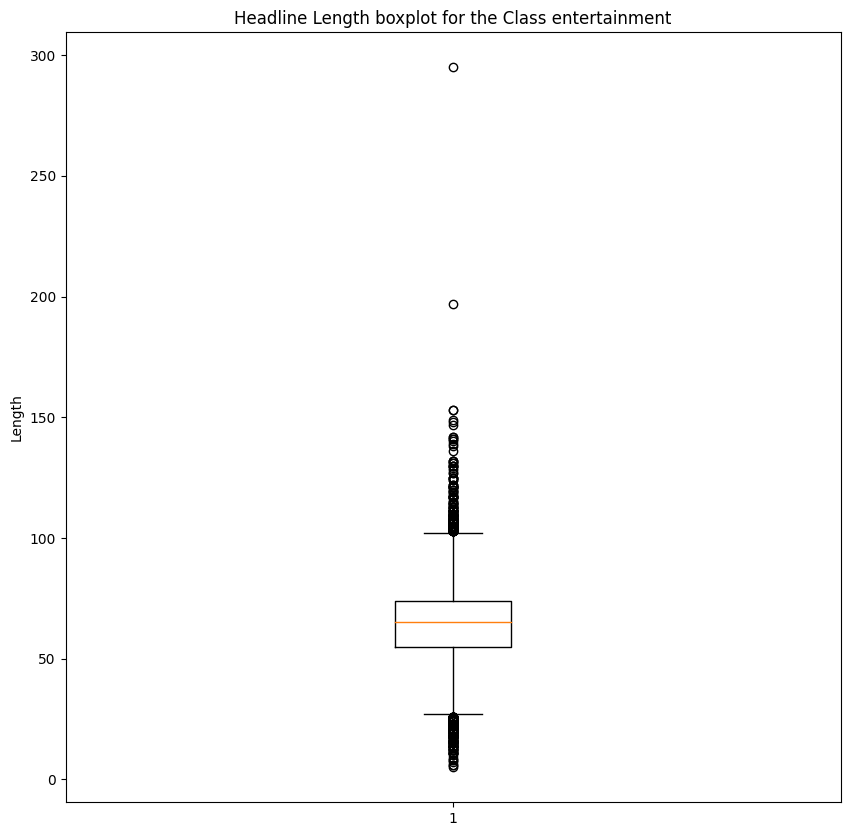

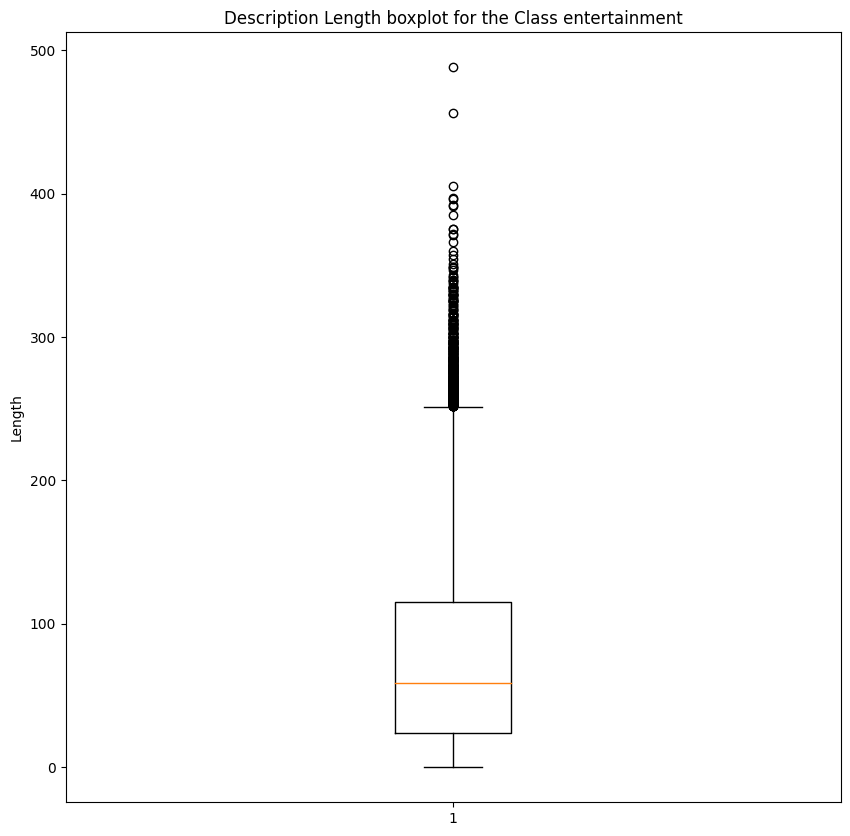

News class count:  {'politics': 35602, 'wellness': 17945, 'entertainment': 17362, 'travel': 9900, 'style & beauty': 9814, 'parenting': 8791, 'healthy living': 6694, 'queer voices': 6347, 'food & drink': 6340, 'business': 5992, 'comedy': 5400, 'sports': 5077, 'black voices': 4583, 'home & living': 4320, 'parents': 3955, 'the worldpost': 3664, 'weddings': 3653, 'women': 3572, 'crime': 3562, 'impact': 3484, 'divorce': 3426, 'world news': 3299, 'media': 2944, 'weird news': 2777, 'green': 2622, 'worldpost': 2579, 'religion': 2577, 'style': 2254, 'science': 2206, 'tech': 2104, 'taste': 2096, 'money': 1756, 'arts': 1509, 'environment': 1444, 'fifty': 1401, 'good news': 1398, 'u.s. news': 1377, 'arts & culture': 1339, 'college': 1144, 'latino voices': 1130, 'culture & arts': 1074, 'education': 1014}
Average headline lengths per class:  {'u.s. news': 68.38198983297022, 'world news': 65.66201879357381, 'arts & culture': 65.21433905899926, 'latino voices': 65.01150442477876, 'entertainment': 64.6

In [7]:
from numpy.lib.function_base import median
from numpy import mean
import matplotlib.pyplot as plt

# Output class distribution
news_classes = list(df["category"].unique())
news_classes_count = {}
headline_lengths_per_class = {}
desc_lengths_per_class = {}
avg_headline_lengths_per_class = {}
avg_desc_lengths_per_class = {}
median_headline_lengths_per_class = {}
median_desc_lengths_per_class = {}

for news_class in news_classes:
  headline_lengths_per_class[news_class] = []
  desc_lengths_per_class[news_class] = []
  df_class = df[df["category"] == news_class]
  news_classes_count[news_class] = df_class.shape[0]
  for val in df_class["headline"]:
    headline_lengths_per_class[news_class].append(len(val))
  avg_headline_lengths_per_class[news_class] = mean(headline_lengths_per_class[news_class])
  median_headline_lengths_per_class[news_class] = median(headline_lengths_per_class[news_class])
  for val in df_class["short_description"]:
    desc_lengths_per_class[news_class].append(len(val))
  avg_desc_lengths_per_class[news_class] = mean(desc_lengths_per_class[news_class])
  median_desc_lengths_per_class[news_class] = median(desc_lengths_per_class[news_class])

news_classes_count = dict(sorted(news_classes_count.items(), key=lambda item: item[1], reverse=True))
avg_headline_lengths_per_class = dict(sorted(avg_headline_lengths_per_class.items(), key=lambda item: item[1], reverse=True))
median_headline_lengths_per_class = dict(sorted(median_headline_lengths_per_class.items(), key=lambda item: item[1], reverse=True))
avg_desc_lengths_per_class = dict(sorted(avg_desc_lengths_per_class.items(), key=lambda item: item[1], reverse=True))
median_desc_lengths_per_class = dict(sorted(median_desc_lengths_per_class.items(), key=lambda item: item[1], reverse=True))

i = 0
for key in news_classes_count.keys():
  if i==3:
    break
  plt.figure(figsize=(10, 10))
  plt.title('Headline Length boxplot for the Class ' + key)
  plt.ylabel('Length')
  plt.boxplot(headline_lengths_per_class[key])
  plt.figure(figsize=(10, 10))
  plt.title('Description Length boxplot for the Class ' + key)
  plt.ylabel('Length')
  plt.boxplot(desc_lengths_per_class[key])
  plt.show()
  i += 1


print("News class count: ", news_classes_count)
print("Average headline lengths per class: ", avg_headline_lengths_per_class)
print("Average short desc lengths per class: ", avg_desc_lengths_per_class)
print("Median headline lengths per class: ", median_headline_lengths_per_class)
print("Median short desc lengths per class: ", median_desc_lengths_per_class)




The Wordcloud for class "politics" is shown below:

Word frequencies (minus stopwords) for class "politics": Counter({'trump': 10033, 'donald': 3122, 'gop': 1928, 'clinton': 1763, 'obama': 1679, 'says': 1475, 'new': 1380, 'house': 1332, 'hillary': 1304, 'u': 1089, 'white': 976, 'court': 909, 'republicans': 883, 'bill': 842, 'democrats': 838, 'senate': 830, 'sanders': 824, 'president': 775, 'election': 737, 'bernie': 723, 'campaign': 702, 'state': 661, 'could': 638, 'health': 632, 'supreme': 627, 'republican': 594, 'people': 578, 'care': 554, 'congress': 551, 'email': 548, 'americans': 515, 'america': 515, 'democratic': 511, 'biden': 504, 'obamacare': 498, 'anti': 493, 'one': 491, 'paul': 484, 'first': 484, 'tax': 479, 'gun': 465, 'morning': 463, 'climate': 462, 'huffpost': 462, 'vote': 461, 'john': 461, 'report': 459, 'debate': 457, 'calls': 451, 'would': 449, 'get': 445, 'know': 441, 'war': 441, 'plan': 438, 'back': 435, 'say': 432, 'ban': 430, 'cruz': 429, 'still': 422, 'russia': 410

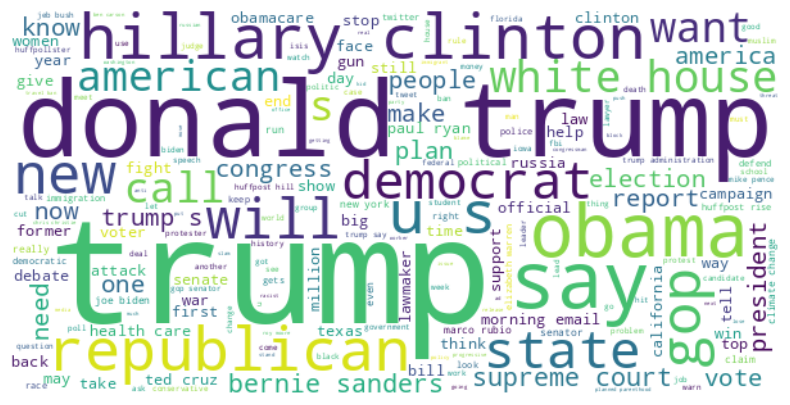

The Wordcloud for class "wellness" is shown below:

Word frequencies (minus stopwords) for class "wellness": Counter({'study': 914, 'health': 811, 'life': 682, 'cancer': 654, 'sleep': 607, '5': 580, 'new': 574, 'could': 518, 'day': 506, 'ways': 488, 'weight': 487, 'healthy': 431, 'lost': 391, 'may': 380, 'heart': 375, '10': 365, 'get': 357, 'risk': 351, 'video': 343, 'love': 343, 'help': 338, 'make': 335, 'stress': 335, 'tips': 328, 'finds': 326, 'people': 325, 'yoga': 320, 'time': 310, '7': 306, 'food': 303, 'things': 277, 'year': 277, 'good': 277, 'linked': 275, 'one': 265, 'pounds': 264, '3': 261, 'brain': 259, 'best': 253, 'loss': 247, 'part': 247, 'work': 242, 'better': 236, 'exercise': 232, 'meditation': 228, 'disease': 226, 'living': 221, 'guide': 219, 'world': 217, '6': 214, 'know': 213, 'eating': 213, 'women': 206, 'care': 204, 'workout': 204, 'body': 195, '8': 190, 'happiness': 189, 'diet': 182, 'fear': 182, 'gps': 178, 'need': 175, 'drug': 175, 'foods': 170, 'eat': 168, '4':

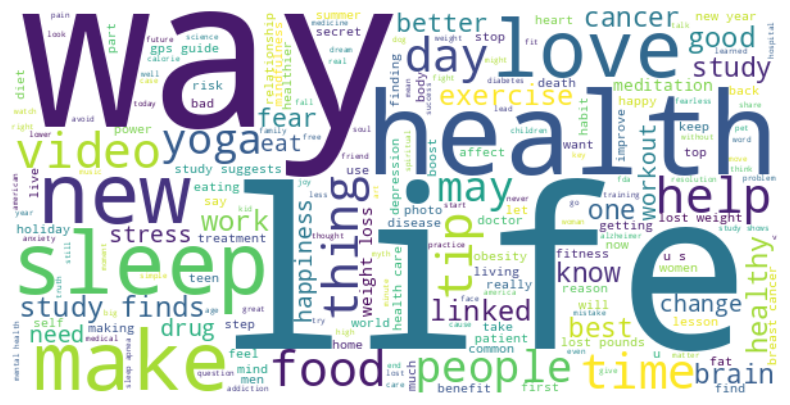

The Wordcloud for class "entertainment" is shown below:

Word frequencies (minus stopwords) for class "entertainment": Counter({'new': 1188, 'trump': 809, 'star': 614, 'says': 574, 'first': 513, 'show': 452, 'movie': 442, 'trailer': 411, 'donald': 404, 'video': 401, 'kardashian': 389, 'watch': 366, 'season': 343, 'taylor': 339, 'dead': 329, 'game': 327, 'film': 321, 'music': 317, 'swift': 312, 'like': 310, 'one': 308, 'best': 300, '2': 291, 'kim': 281, 'office': 281, 'year': 279, 'time': 274, 'box': 264, 'john': 263, 'love': 259, 'jenner': 257, 'back': 244, 'netflix': 240, 'thrones': 239, 'awards': 230, 'make': 229, 'get': 229, 'day': 228, 'james': 225, 'snl': 224, 'man': 221, 'west': 220, 'american': 217, 'tv': 216, 'gets': 215, 'photo': 212, 'reveals': 210, 'wars': 209, 'baby': 206, 'night': 206, 'life': 205, 'kanye': 204, 'chris': 204, 'jennifer': 204, 'hollywood': 204, 'fans': 202, 'live': 193, 'people': 191, 'justin': 189, 'album': 188, 'story': 184, 'song': 180, 'actor': 178, 'us

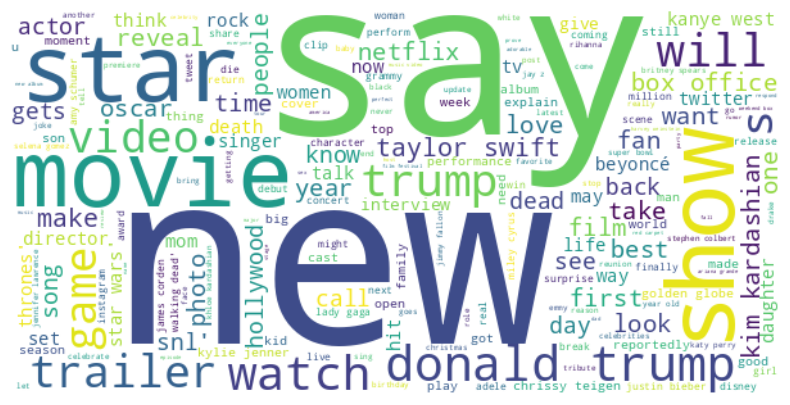

In [8]:
# Wordcloud for the headlines
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

# Displaying the Wordcloud, word frequencies and
for i in range(3):
  news_class = list(news_classes_count.keys())[i]
  print(f'The Wordcloud for class "{news_class}" is shown below:\n')
  combined_class_headlines = " ".join(df[df["category"] == news_class]["headline"])
  # print(combined_class_headlines[:1000])
  words = re.findall(r'\w+', combined_class_headlines)
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
  word_freq = Counter(filtered_words)
  print(f'Word frequencies (minus stopwords) for class "{news_class}": {word_freq}')

  for j in [2,3]:
    n_grams = ngrams(words, j)
    n_gram_counter = Counter(n_grams)
    top_ten_n_grams = n_gram_counter.most_common(10)
    print(f'Most common {j}-grams for class {news_class}: {top_ten_n_grams}')

  wordcloud = WordCloud(width=600, height=300, background_color='white').generate(combined_class_headlines)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [9]:
authors_ctgry_map = {}
authors_count_map = {}
for i in range(len(df)):
  # print(df["authors"].iloc[i])
  for author in df["authors"].iloc[i]:
    if author in authors_ctgry_map:
        authors_count_map[author] += 1
        if df["category"].iloc[i] in authors_ctgry_map[author]:
          (authors_ctgry_map[author])[df["category"].iloc[i]] +=1
        else:
          (authors_ctgry_map[author])[df["category"].iloc[i]] = 1
    else:
      authors_ctgry_map[author] = {}
      authors_count_map[author] = 1

print("Author - news category relationship: ", authors_ctgry_map)




Author - news category relationship:  {'carla k. johnson': {'politics': 1, 'healthy living': 1}, 'mary papenfuss': {'world news': 62, 'politics': 863, 'u.s. news': 69, 'environment': 13, 'tech': 18, 'crime': 78, 'comedy': 129, 'entertainment': 71, 'sports': 14, 'black voices': 7, 'women': 12, 'science': 20, 'media': 55, 'business': 25, 'weird news': 29, 'queer voices': 3, 'latino voices': 2, 'religion': 7, 'green': 77, 'arts & culture': 6, 'the worldpost': 10, 'good news': 2, 'healthy living': 5, 'education': 1}, 'elyse wanshel': {'u.s. news': 9, 'entertainment': 278, 'politics': 23, 'crime': 4, 'sports': 4, 'comedy': 48, 'culture & arts': 3, 'world news': 1, 'queer voices': 20, 'weird news': 17, 'wellness': 1, 'black voices': 39, 'environment': 1, 'style & beauty': 1, 'women': 23, 'travel': 4, 'latino voices': 10, 'arts & culture': 12, 'parents': 19, 'style': 3, 'green': 1, 'taste': 9, 'college': 1, 'healthy living': 6, 'media': 1, 'the worldpost': 4, 'impact': 2, 'business': 1, 'reli

In [10]:
authors_count_map = dict(sorted(authors_count_map.items(), key=lambda item: item[1], reverse=True))
print("No. of articles each author has written: ", authors_count_map)


No. of articles each author has written:  {'reuters': 6771, 'lee moran': 2968, 'contributor\nauthor': 2348, 'author': 2301, 'ron dicker': 2223, 'contributorauthor': 1917, 'contributorwriter': 1694, 'ed mazza': 1596, 'contributor\nwriter': 1592, 'mary papenfuss': 1579, 'writer': 1560, 'contributor\ncontributor': 1529, 'contributor\nfounder': 1393, 'cole delbyck': 1273, 'carly ledbetter': 1183, 'curtis m. wong': 1148, 'andy mcdonald': 1114, 'david moye': 1087, 'nina golgowski': 1080, 'julia brucculieri': 1067, 'igor bobic': 1024, 'm.d.': 1022, 'bill bradley': 1020, 'blogger': 1020, 'sam levine': 967, 'dana oliver': 959, 'dominique mosbergen': 956, 'speaker': 952, 'ph.d.': 922, 'contributorfounder': 905, 'caroline bologna': 892, 'michelle manetti': 885, 'michelle persad': 882, 'contributorpresident': 878, 'ellie krupnick': 873, 'jenna amatulli': 825, 'jamie feldman': 813, 'daniel marans': 806, 'ryan grenoble': 800, 'ariel edwards-levy': 784, 'nick visser': 771, 'james michael nichols': 76

In [11]:
# Top 3 writers
print("Articles written by lee moran: ", authors_ctgry_map["lee moran"])
print("Articles written by ron dicker: ", authors_ctgry_map["ron dicker"])
print("Articles written by ed mazza: ", authors_ctgry_map["ed mazza"])

Articles written by lee moran:  {'entertainment': 491, 'politics': 533, 'u.s. news': 31, 'world news': 28, 'sports': 111, 'weird news': 394, 'culture & arts': 2, 'comedy': 841, 'media': 80, 'black voices': 32, 'women': 25, 'crime': 95, 'queer voices': 6, 'latino voices': 6, 'tech': 18, 'arts & culture': 41, 'parents': 41, 'taste': 12, 'science': 46, 'religion': 8, 'impact': 13, 'green': 2, 'style': 4, 'the worldpost': 26, 'travel': 4, 'business': 2, 'good news': 74, 'education': 1}
Articles written by ron dicker:  {'politics': 83, 'entertainment': 657, 'sports': 421, 'environment': 6, 'world news': 4, 'weird news': 269, 'u.s. news': 11, 'media': 22, 'comedy': 414, 'crime': 47, 'black voices': 40, 'travel': 9, 'education': 1, 'queer voices': 17, 'college': 1, 'taste': 12, 'latino voices': 9, 'style': 6, 'parents': 9, 'the worldpost': 6, 'good news': 22, 'business': 13, 'women': 9, 'religion': 6, 'arts & culture': 3, 'tech': 5, 'science': 18, 'healthy living': 3, 'green': 11, 'fifty': 2,

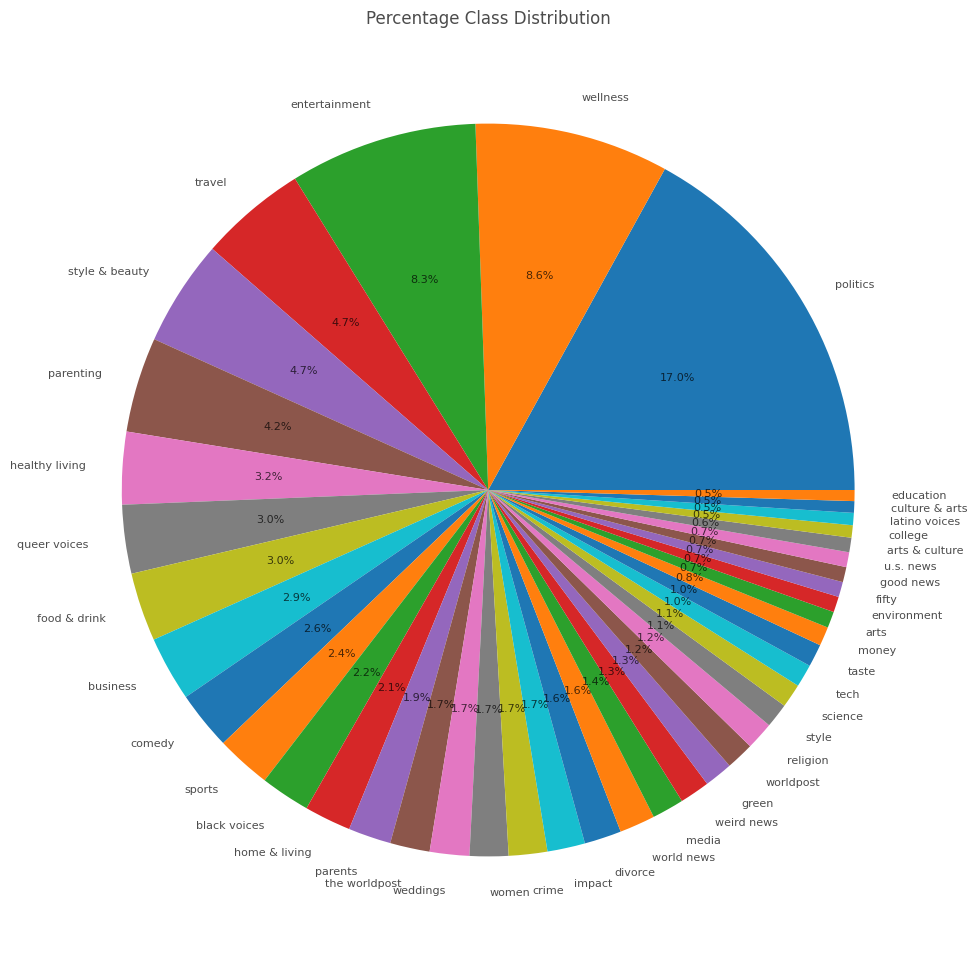

In [12]:
plt.figure(figsize=(10, 10))
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize' : 8,
                                                                                                                'alpha' : .7});
plt.title('Percentage Class Distribution', alpha=.7);
plt.tight_layout();

In [13]:
df["category"] = df["category"].replace(
              {"healthy living": "wellness",
              "queer voices": "groups voices",
              "worldpost": "world news",
              "science": "science & tech",
              "tech": "science & tech",
              "money": "business & finances",
              "arts": "arts & culture",
              "college": "education",
              "latino voices": "groups voices",
              "business": "business & finances",
              "parents": "parenting",
              "black voices": "groups voices",
              "the worldpost": "world news",
              "style": "style & beauty",
              "green": "environment",
              "taste": "food & drink",
              "culture & arts": "arts & culture"}
            )

In [14]:
from sklearn.preprocessing import LabelEncoder

df['combined_text'] = df['headline'] + " " + df['short_description']

reduced_df = df[['combined_text', 'category']]

news_classes = list(reduced_df["category"].unique())
news_class_index = {}

for i in range(len(news_classes)):
  news_class_index[news_classes[i]] = i

label_encoder = LabelEncoder()
reduced_df["category"] = label_encoder.fit_transform(reduced_df["category"])

print("Dataframe: \n", reduced_df)


Dataframe: 
                                             combined_text  category
0       over 4 million americans roll up sleeves for o...        22
1       american airlines flyer charged, banned for li...        22
2       23 of the funniest tweets about cats and dogs ...         2
3       the funniest tweets from parents this week (se...        15
4       woman who called cops on black bird-watcher lo...        22
...                                                   ...       ...
209522  rim ceo thorsten heins' 'significant' plans fo...        18
209523  maria sharapova stunned by victoria azarenka i...        19
209524  giants over patriots, jets over colts among  m...        19
209525  aldon smith arrested: 49ers linebacker busted ...        19
209526  dwight howard rips teammates after magic loss ...        19

[209527 rows x 2 columns]


<ipython-input-14-2801bd263262>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["category"] = label_encoder.fit_transform(reduced_df["category"])


# Classifying text with BERT (without text preprocessing)

## Reference: https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [15]:
!pip install -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    

In [16]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [28]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 4
seed = 42

validation_split = 0.3

dataset = tf.data.Dataset.from_tensor_slices((reduced_df['combined_text'].values, reduced_df['category'].values))
dataset = dataset.shuffle(buffer_size=len(df), seed=seed, reshuffle_each_iteration=False)

ds_size = len(df)
num_train_samples = int((1 - validation_split) * ds_size)
train_dataset = dataset.take(num_train_samples)
validation_dataset = dataset.skip(num_train_samples)

train_dataset = train_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [29]:
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4"
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_encoder_model = hub.KerasLayer(tfhub_handle_encoder)

In [30]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(["Maria Sharapova beats Victoria Azarenka"]))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.469061]], shape=(1, 1), dtype=float32)


In [31]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

hist = classifier_model.fit(x=train_dataset, validation_data=validation_dataset, epochs=epochs)

print("History: \n", hist)

Epoch 1/5
20466/36667 [===============>..............] - ETA: 2:05:40 - loss: -1610.9636 - binary_accuracy: 0.0359

In [ ]:
loss, accuracy = classifier_model.evaluate(validation_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
classifier_model.save("BERT_trial_1_model", include_optimizer=False)
